In [1]:
%matplotlib inline
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.cluster import MiniBatchKMeans,KMeans,SpectralClustering
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score

In [2]:
train = pd.read_csv('train_encode2.csv')
test = pd.read_csv('test_encode2.csv')

(array([190., 141., 113., 108., 101., 107., 104., 100., 105.,  85.,  89.,
         75.,  61.,  57.,  50.,  55.,  46.,  37.,  36.,  43.,  24.,  26.,
         19.,  27.,  19.,  25.,  25.,  21.,  16.,  15.,  17.,  13.,  12.,
         13.,   9.,   9.,  17.,  11.,   7.,   6.,   9.,   9.,   9.,   9.,
          6.,   6.,  14.,   8.,   7.,   6.,   1.,   9.,   7.,   7.,   4.,
          2.,   7.,   8.,   2.,   3.,   2.,   7.,   4.,   6.,   8.,   7.,
          0.,   3.,   6.,   1.,   2.,   2.,   2.,   4.,   2.,   3.,   2.,
          3.,   2.,   0.,   0.,   3.,   3.,   0.,   2.,   1.,   0.,   3.,
          2.,   1.,   1.,   1.,   1.,   4.,   1.,   3.,   1.,   2.,   1.,
          1.,   0.,   2.,   1.,   0.,   2.,   2.,   1.,   1.,   1.,   1.,
          3.,   1.,   1.,   0.,   1.,   0.,   2.,   1.,   0.,   0.,   1.,
          0.,   0.,   0.,   2.,   1.,   0.,   0.,   1.,   1.,   1.,   0.,
          1.,   0.,   0.,   0.,   1.,   2.,   1.,   0.,   1.,   1.,   0.,
          1.,   0.,   0.,   1.,   1., 

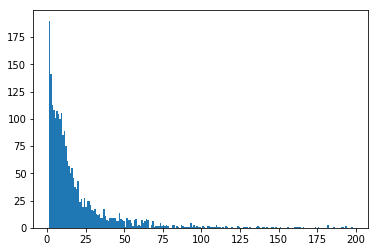

In [145]:
plt.hist(train.groupby('patient_id').count()['key'], bins=200)

In [55]:
len(train.columns.unique())

224

In [4]:
len(test.columns)

217

In [5]:
len(train.columns)

224

In [30]:
set(train.columns)-set(train.columns[np.isin(train.columns, test.columns)])

{'key_label',
 'log_y_mean_HR',
 'log_y_mean_MAP',
 'sqrt_y_mean_HR',
 'sqrt_y_mean_MAP',
 'y_mean_HR',
 'y_mean_MAP'}

In [152]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train.drop(columns = ['log_y_mean_HR','key_label', 
                                                                          'log_y_mean_MAP','sqrt_y_mean_HR',
                                                                        'sqrt_y_mean_MAP', 'y_mean_HR','y_mean_MAP']), 
                                                    train[['y_mean_MAP', 'y_mean_HR','log_y_mean_HR', 
                                                            'sqrt_y_mean_HR','sqrt_y_mean_MAP','log_y_mean_MAP']],
                                                    test_size=0.25, random_state=42)

#### predict y_mean_MAP

In [81]:
X_train.drop(columns = ['xx4_series_cluster_mean_enc_y_mean_MAP',
       'xx3_series_cluster_mean_enc_y_mean_MAP', 'xx3|3', 'xx2',
       'xx2_max', 'xx3|2', 'xx4|10', 'xx3|4', 'xx4|8', 'xx3|14', 'xx4|6',
       'xx3|18', 'xx3|20', 'xx2|1', 'xx3|24', 'xx3|7', 'x2', 'xx1|1',
       'xx2|28', 'xx3|5', 'xx1|30', 'xx2|29', 'xx3|6', 'xx3|11', 'xx2|27',
       'xx2|18', 'xx3|12', 'xx2|19', 'xx2|7', 'xx2|5', 'xx2|20', 'xx1|29',
       'xx2|25', 'xx2|24', 'xx2|4', 'xx2|14', 'xx2|8', 'xx2|6', 'xx2|21',
       'xx1|3', 'xx1|28', 'xx2|2', 'xx2|3', 'xx1|4',
       'xx4_cluster_mean_enc_y_mean_MAP', 'xx1|27', 'xx1|22', 'xx1|23',
       'xx1|24', 'xx2|10', 'xx2|15', 'xx2|23', 'xx2|16', 'xx2|26',
       'xx2|17', 'xx2|22', 'xx2_series_cluster', 'xx1|6', 'xx2|11',
       'xx1|5', 'xx1|19', 'xx2|9', 'xx1|26', 'xx1|20', 'xx1|25', 'x6',
       'xx1|10', 'xx1|2', 'xx2|12', 'xx1|17', 'xx1|12', 'xx1|13', 'xx1|9',
       'xx1|21', 'xx1|11', 'xx1|16', 'xx2|13', 'xx1|8', 'xx1|7', 'xx1|14',
       'xx1|18', 'xx3_cluster_mean_enc_y_mean_MAP', 'xx1|15', 'xx3',
       'gender', 'xx1_series_cluster_mean_enc_y_mean_HR', 'x4', 'xx1',
       'xx1_cluster_mean_enc_y_mean_HR', 'x5', 'key'], inplace=True)
X_test.drop(columns = ['xx4_series_cluster_mean_enc_y_mean_MAP',
       'xx3_series_cluster_mean_enc_y_mean_MAP', 'xx3|3', 'xx2',
       'xx2_max', 'xx3|2', 'xx4|10', 'xx3|4', 'xx4|8', 'xx3|14', 'xx4|6',
       'xx3|18', 'xx3|20', 'xx2|1', 'xx3|24', 'xx3|7', 'x2', 'xx1|1',
       'xx2|28', 'xx3|5', 'xx1|30', 'xx2|29', 'xx3|6', 'xx3|11', 'xx2|27',
       'xx2|18', 'xx3|12', 'xx2|19', 'xx2|7', 'xx2|5', 'xx2|20', 'xx1|29',
       'xx2|25', 'xx2|24', 'xx2|4', 'xx2|14', 'xx2|8', 'xx2|6', 'xx2|21',
       'xx1|3', 'xx1|28', 'xx2|2', 'xx2|3', 'xx1|4',
       'xx4_cluster_mean_enc_y_mean_MAP', 'xx1|27', 'xx1|22', 'xx1|23',
       'xx1|24', 'xx2|10', 'xx2|15', 'xx2|23', 'xx2|16', 'xx2|26',
       'xx2|17', 'xx2|22', 'xx2_series_cluster', 'xx1|6', 'xx2|11',
       'xx1|5', 'xx1|19', 'xx2|9', 'xx1|26', 'xx1|20', 'xx1|25', 'x6',
       'xx1|10', 'xx1|2', 'xx2|12', 'xx1|17', 'xx1|12', 'xx1|13', 'xx1|9',
       'xx1|21', 'xx1|11', 'xx1|16', 'xx2|13', 'xx1|8', 'xx1|7', 'xx1|14',
       'xx1|18', 'xx3_cluster_mean_enc_y_mean_MAP', 'xx1|15', 'xx3',
       'gender', 'xx1_series_cluster_mean_enc_y_mean_HR', 'x4', 'xx1',
       'xx1_cluster_mean_enc_y_mean_HR', 'x5', 'key'], inplace=True)

In [148]:
X_train.drop(columns = ['xx1|22', 'xx1|23',
       'xx1|24', 'xx2|10', 'xx2|15', 'xx2|23', 'xx2|16', 'xx2|26',
       'xx2|17', 'xx2|22', 'xx2_series_cluster', 'xx1|6', 'xx2|11',
       'xx1|5', 'xx1|19', 'xx2|9', 'xx1|26', 'xx1|20', 'xx1|25', 'x6',
       'xx1|10', 'xx1|2', 'xx2|12', 'xx1|17', 'xx1|12', 'xx1|13', 'xx1|9',
       'xx1|21', 'xx1|11', 'xx1|16', 'xx2|13', 'xx1|8', 'xx1|7', 'xx1|14',
       'xx1|18', 'xx3_cluster_mean_enc_y_mean_MAP', 'xx1|15', 'xx3',
       'gender', 'xx1_series_cluster_mean_enc_y_mean_HR', 'x4', 'xx1',
       'xx1_cluster_mean_enc_y_mean_HR', 'x5', 'key'], inplace=True)
X_test.drop(columns = ['xx1|22', 'xx1|23',
       'xx1|24', 'xx2|10', 'xx2|15', 'xx2|23', 'xx2|16', 'xx2|26',
       'xx2|17', 'xx2|22', 'xx2_series_cluster', 'xx1|6', 'xx2|11',
       'xx1|5', 'xx1|19', 'xx2|9', 'xx1|26', 'xx1|20', 'xx1|25', 'x6',
       'xx1|10', 'xx1|2', 'xx2|12', 'xx1|17', 'xx1|12', 'xx1|13', 'xx1|9',
       'xx1|21', 'xx1|11', 'xx1|16', 'xx2|13', 'xx1|8', 'xx1|7', 'xx1|14',
       'xx1|18', 'xx3_cluster_mean_enc_y_mean_MAP', 'xx1|15', 'xx3',
       'gender', 'xx1_series_cluster_mean_enc_y_mean_HR', 'x4', 'xx1',
       'xx1_cluster_mean_enc_y_mean_HR', 'x5', 'key'], inplace=True)

In [156]:
X_train.drop(columns = ['key'], inplace=True)
X_test.drop(columns = ['key'], inplace=True)

In [128]:
import lightgbm as lgb

In [133]:
train_data = lgb.Dataset(X_train, label = y_train['y_mean_MAP'], 
                         categorical_feature=['x3'])
model = lgb.train(params = {'metric': 'MSE', 'num_iterations':150, 
                            'learning_rate':0.08,
                           'boosting':'gbdt'} ,train_set = train_data)
print(r2_score(model.predict(X_train), y_train[['y_mean_MAP']]))
print(r2_score(model.predict(X_test), y_test[['y_mean_MAP']]))

/anaconda3/lib/python3.7/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/anaconda3/lib/python3.7/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


0.9255985321664346
0.8879782270568988


In [134]:
0.9285451309116477
0.8881285728241718

0.8881285728241718

In [96]:
# plt.scatter(range(len(y_train.y_mean_MAP)), sorted(y_train.y_mean_MAP))

In [95]:
# plt.hist(y_train.y_mean_MAP, bins=200)

In [153]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score

In [157]:
rf_MAP = RandomForestRegressor(n_estimators=100, max_depth=20, min_samples_split=40, min_samples_leaf=20)

In [158]:
rf_MAP.fit(X_train, y_train['y_mean_MAP'])
y_train_MAP_pred = rf_MAP.predict(X_train)
r2_score(y_train['y_mean_MAP'], y_train_MAP_pred)
y_val_MAP_pred = rf_MAP.predict(X_test)
r2_score(y_test['y_mean_MAP'], y_val_MAP_pred)

0.8994939198544686

In [159]:
print(r2_score(y_train['y_mean_MAP'], y_train_MAP_pred))
print(r2_score(y_test['y_mean_MAP'], y_val_MAP_pred))

0.928908137583798
0.8994939198544686
